In [6]:
from google.colab import files
uploaded = files.upload()


Saving animal_audio.zip to animal_audio.zip


In [7]:
!unzip animal_audio.zip -d /content/audio_clips

Archive:  animal_audio.zip
  inflating: /content/audio_clips/animal/00b01445_nohash_0.wav  
  inflating: /content/audio_clips/animal/00f0204f_nohash_1.wav  
  inflating: /content/audio_clips/animal/00f0204f_nohash_2.wav  
  inflating: /content/audio_clips/animal/00f0204f_nohash_3.wav  
  inflating: /content/audio_clips/animal/012c8314_nohash_0.wav  
  inflating: /content/audio_clips/animal/0132a06d_nohash_0.wav  
  inflating: /content/audio_clips/animal/01648c51_nohash_0.wav  
  inflating: /content/audio_clips/animal/01bcfc0c_nohash_1.wav  
  inflating: /content/audio_clips/animal/01d22d03_nohash_0.wav  
  inflating: /content/audio_clips/animal/026290a7_nohash_0.wav  
  inflating: /content/audio_clips/animal/037c445a_nohash_0.wav  
  inflating: /content/audio_clips/animal/03cf93b1_nohash_0.wav  
  inflating: /content/audio_clips/animal/0474c92a_nohash_0.wav  
  inflating: /content/audio_clips/animal/095847e4_nohash_0 (2).wav  
  inflating: /content/audio_clips/animal/095847e4_nohash_0.

In [8]:
!pip install librosa
import librosa
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [13]:
# Function to Load Audio Files and Extract MFCC Features
def load_and_extract_features(folder):
    features = []
    for file in os.listdir(folder):
        if file.endswith('.wav'):
            print(f"Processing file: {file}")
            path = os.path.join(folder, file)
            audio, sr = librosa.load(path, sr=None)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr)
            if mfccs.size > 0:
                features.append(np.mean(mfccs.T, axis=0))
            else:
                print(f"Warning: No MFCC features extracted from {file}")
    return features

# Load and Extract Features from Audio Files
audio_features = load_and_extract_features('/content/audio_clips/animal')

# Debugging: Check if features are extracted
if len(audio_features) == 0:
    print("No features were extracted. Please check the audio files.")
else:
    print(f"Extracted Features: {audio_features}")

    # Scale the Features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(audio_features)

    # Debugging: Check the shape of the scaled features
    print(f"Scaled Features Shape: {scaled_features.shape}")

    # Apply KMeans Clustering
    kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
    kmeans.fit(scaled_features)
    labels = kmeans.labels_

    # Output Cluster Labels
    print("Cluster Labels for Each Audio File:")
    print(labels)


Processing file: 64da5281_nohash_0.wav
Processing file: 1c3f50ad_nohash_1.wav
Processing file: 096456f9_nohash_2.wav
Processing file: 84bf12ff_nohash_0.wav
Processing file: abbfc3b4_nohash_0.wav
Processing file: ad1429cf_nohash_0.wav
Processing file: eb0676ec_nohash_0.wav
Processing file: 493392c6_nohash_0.wav
Processing file: 7fc74fbe_nohash_0.wav
Processing file: 520b2c17_nohash_0.wav
Processing file: 50928b05_nohash_0.wav
Processing file: 39a6b995_nohash_0.wav
Processing file: 92b2bf59_nohash_0.wav
Processing file: 4c4d2526_nohash_1.wav
Processing file: af130f12_nohash_1.wav
Processing file: 748cb308_nohash_0.wav
Processing file: 29fb33da_nohash_0.wav
Processing file: 1f3bece8_nohash_0 (2).wav
Processing file: 0474c92a_nohash_0.wav
Processing file: 179a61b7_nohash_0.wav
Processing file: 0f7dc557_nohash_0 (2).wav
Processing file: 6205088b_nohash_0.wav
Processing file: edd8bfe3_nohash_0.wav
Processing file: ee4a907f_nohash_1.wav
Processing file: cd7f8c1b_nohash_0.wav
Processing file: 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels for Each Audio File:
[2 1 4 0 2 4 0 2 3 1 3 3 0 4 2 2 0 4 2 1 3 2 2 2 0 2 2 1 1 0 0 2 2 4 2 3 4
 2 2 2 2 1 2 3 2 2 0 4 3 2 2 4 0 4 0 2 2 2 2 0 2 0 4 0 3 2 1 1 0 0 4 3 3 1
 3 4 0 0 2 1 4 4 0 1 2 0 4 0 2 2 3 0 3 4 0 4 1 0 1 0 2 0 4 1 4 3 2 3 2 2 4
 4 2 1 2 2 0 0 2 2 4 2 1 4 0 3 1 4 0 3 3 0 2 0 2 1 1 2 2 1 0 2 3 2 3 3 2 3
 1 1 3 0 2 0 1 4 3 4 2 1 2 1 1 0 3 0 2 4 3 3 2 2 1 4 1 2 2 4 2 4 0 0 3 2 2
 2 2 0 1 2 0 4 4 4 1 2 0 1 1 2 2 0 0 4 4 3 0 1 2 2 0 3 2 4 4 2 4 2 3 2 3 4
 2 0 0 1 2 0 2 0 4 3 3 3 2 0 1 4 0 3 2 4 4 3 2 1 2 4 1 4 4 3 0 3 4 1 4 4 1
 3 1 4 2 1 0 4 2 2 4 0 4 4 3 0 3 4 3 3 4 0 1 2 0 3 0 1 3 3 4 2 0 2 3 2 4 2
 4 4 2 4 2 2 4 1 1 2 1 4 3 2 2 3 2 4 1 1 4 2 4 2 2 4 2 2 2 1 0 0 0 0 0 3 1
 3 2 4 1 0 4 0 1 3 3 2 4 1 4 2 4 4 3 1 1 2 0 4 1 0 0 4 2 4 4 0 1 1 2 0 3 1
 2 2 3 3 3 1 2 3 0 4 1 1 2 0 1 1 4 3 1 2 0 1 0 1 2 1 0 1 3 3 1 2 3 2 0 1 0
 1 2 2 1 2 4 2 4 0 2 2 3 2 3 0 3 2 4 1 4 2 4 2 2 0 0 1 2 3 3 2 4 3 0 0 2 1
 4 3 2 0 2 0 1 2 0 3 0 1 4 0 1 1 1 1 1 1 2 2 1 1 4 2 4 2 1 3 0 1

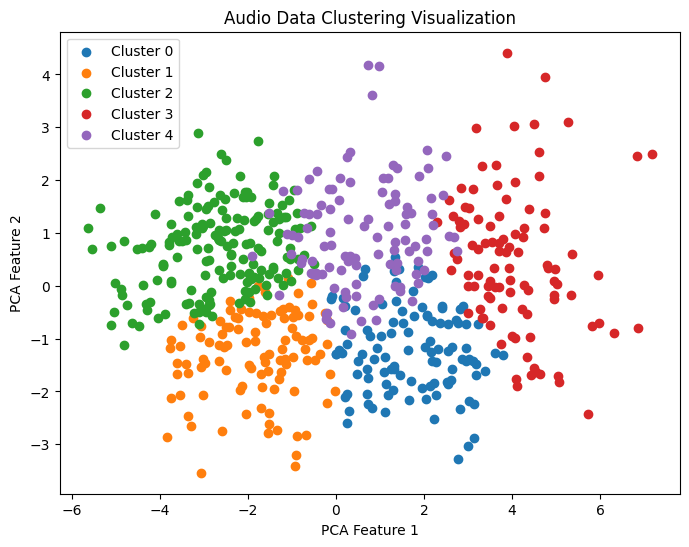

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'scaled_features' is your data and 'labels' are the cluster labels from KMeans
pca = PCA(n_components=2)  # reduce to two dimensions for easy visualization
reduced_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(8, 6))
for i in range(max(labels)+1):
    # plot each cluster with a different color
    plt.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], label=f'Cluster {i}')

plt.title("Audio Data Clustering Visualization")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()
